In [1]:
import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [2]:
# JAKARTA
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case = pd.read_csv('data/new/case_maret_july.csv')

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

,date,rh,avt,mxt,mnt
0,2020-03-18,86.0,27.6,29.0,25.800000
1,2020-03-19,83.0,28.1,31.4,25.800000
2,2020-03-20,82.0,27.4,31.2,25.200000
3,2020-03-21,81.0,28.1,32.4,26.521978
4,2020-03-22,84.0,27.2,31.2,25.000000


In [4]:
mobility.head()

,date,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
0,2020-03-18,-22,-3,-28,-32,-19,11
1,2020-03-19,-28,-12,-33,-38,-21,12
2,2020-03-20,-30,-11,-32,-42,-23,15
3,2020-03-21,-35,-5,-38,-40,-10,11
4,2020-03-22,-49,-22,-59,-49,-12,14


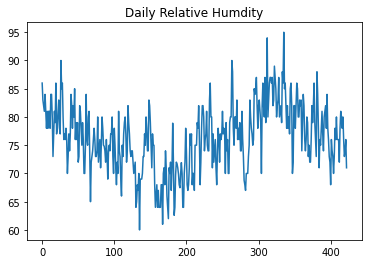

In [5]:
new_weather["rh"].plot()
plt.title("Daily Relative Humdity")
plt.show()

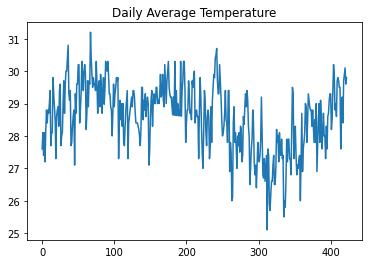

In [6]:
new_weather["avt"].plot()
plt.title("Daily Average Temperature")
plt.show()

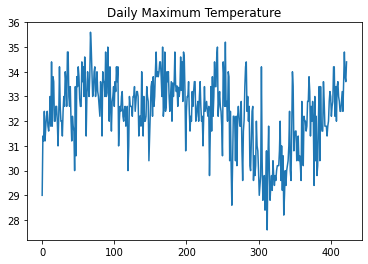

In [7]:
new_weather["mxt"].plot()
plt.title("Daily Maximum Temperature")
plt.show()

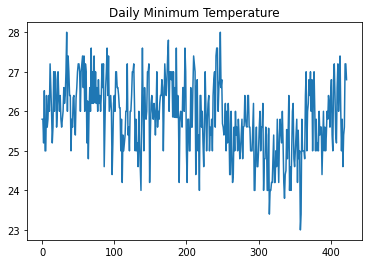

In [8]:
new_weather["mnt"].plot()
plt.title("Daily Minimum Temperature")
plt.show()

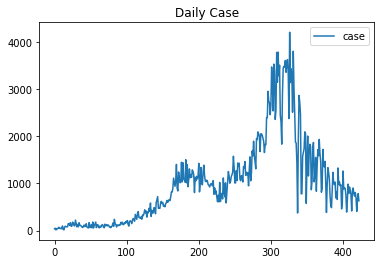

In [9]:
case.plot()
plt.title("Daily Case")
plt.show()

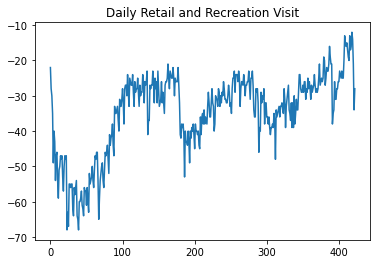

In [10]:
mobility["retail_recreation"].plot()
plt.title("Daily Retail and Recreation Visit")
plt.show()

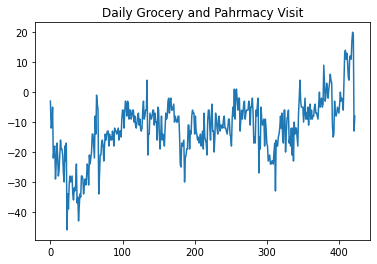

In [11]:
mobility["grocery_pahrmacy"].plot()
plt.title("Daily Grocery and Pahrmacy Visit")
plt.show()

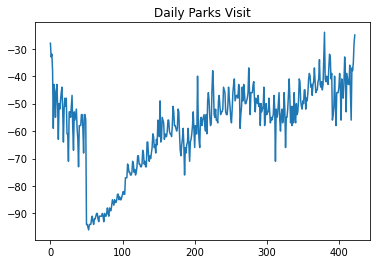

In [12]:
mobility["parks"].plot()
plt.title("Daily Parks Visit")
plt.show()

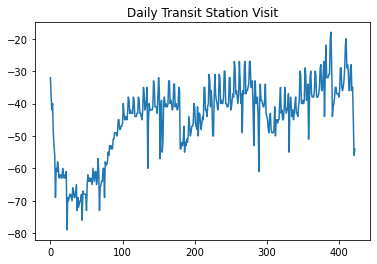

In [13]:
mobility["transit_station"].plot()
plt.title("Daily Transit Station Visit")
plt.show()

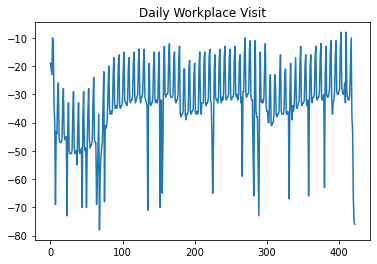

In [14]:
mobility["workplace"].plot()
plt.title("Daily Workplace Visit")
plt.show()

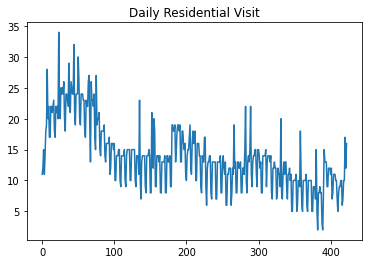

In [15]:
mobility["residential"].plot()
plt.title("Daily Residential Visit")
plt.show()

In [16]:
pd.qcut(case['case'], 4)

0      (13.999, 209.5]
1      (13.999, 209.5]
2      (13.999, 209.5]
3      (13.999, 209.5]
4      (13.999, 209.5]
            ...       
418     (209.5, 845.0]
419     (209.5, 845.0]
420     (209.5, 845.0]
421     (209.5, 845.0]
422     (209.5, 845.0]
Name: case, Length: 423, dtype: category
Categories (4, interval[float64]): [(13.999, 209.5] < (209.5, 845.0] < (845.0, 1330.5] < (1330.5, 4213.0]]

In [17]:
q1 = case.iloc[:211,:]
q2 = case.iloc[211:,:]
#print(q1)
#print(q2)
print(mean(q1))
print(mean(q2))

case    427.222749
dtype: float64
case    1549.783019
dtype: float64


In [18]:
print(q1.var())
print(q2.var())

case    176827.497766
dtype: float64
case    779469.317625
dtype: float64


In [19]:
q1 = weather.iloc[:211,:]
q2 = weather.iloc[211:,:]
#print(q1)
#print(q2)
print(mean(q1))
print(mean(q2))

rh     74.305419
avt    29.069951
mxt    32.902488
mnt    26.196923
dtype: float64
rh     78.526066
avt    28.138389
mxt    31.726066
mnt    25.520000
dtype: float64


In [20]:
print(q1.var())
print(q2.var())

rh     31.678535
avt     0.590429
mxt     1.148444
mnt     0.662877
dtype: float64
rh     26.974317
avt     1.156472
mxt     2.388032
mnt     0.850333
dtype: float64


In [21]:
q1 = mobility.iloc[:211,:]
q2 = mobility.iloc[211:,:]
#print(q1)
#print(q2)
print(mean(q1))
print(mean(q2))

retail_recreation   -40.450237
grocery_pahrmacy    -15.805687
parks               -68.146919
transit_station     -51.469194
workplace           -35.336493
residential          16.938389
dtype: float64
retail_recreation   -29.231132
grocery_pahrmacy     -8.047170
parks               -48.146226
transit_station     -37.872642
workplace           -30.443396
residential          10.948113
dtype: float64


In [22]:
print(q1.var())
print(q2.var())

retail_recreation    157.982036
grocery_pahrmacy      87.281110
parks                223.783074
transit_station      130.412142
workplace            168.795757
residential           27.334281
dtype: float64
retail_recreation     38.605093
grocery_pahrmacy      72.054637
parks                 49.262877
transit_station       44.869959
workplace            141.366449
residential           11.357485
dtype: float64
